# 3.2 Functions (函数)

Functions是python中很重要的概念。可以用def来定义：

In [1]:
def my_function(x, y, z=1.5):
    if z > 1:
        return z * (x + y)
    else:
        return z / (x + y)

上面可以return多个结果，如果没有return语句的话，默认会返回None。

每个function有positional arguments（位置参数） and keyword arguments（关键字参数）。keyword argument通常用来指定默认的值或可选参数。在上面的函数里，x和y是位置参数，而z是一个关键字参数。我们可以通过下面的方式调用：

In [2]:
my_function(5, 6, z=0.7)

0.06363636363636363

In [3]:
my_function(3.14, 7, 3.5)

35.49

In [4]:
my_function(10, 20)

45.0

一个需要强制遵守的规则是，函数的参数顺序为，位置参数在前，关键字参数在后。而多个关键字参数的位置是可以自己指定的。比如下面的x，y，z都是关键字参数，调用函数的时候没有按顺序也可以：

In [5]:
my_function(x=5, y=6, z=7)
my_function(y=6, x=5, z=7)

77

# 1 Namespaces, Scope, and Local Functions（命名空间，作用范围，局部函数）

scope分两种，global and local （全局和局部）。namespace用来描述变量的作用范围。当调用一个函数的时候，会自动创建一个局部命名空间，用来存放函数的参数，一旦函数结束，局部命名空间会被自动废弃掉。考虑下面的例子：

In [13]:
def func():
    b = []
    for i in range(5):
        b.append(i)
        
func()
b

NameError: name 'b' is not defined

当func()被调用，会创建一个空list a，然后5个元素赋给a。函数结束后，a也会被废弃。假设有下面的定义：

In [14]:
a = []
def func():
    for i in range(5):
        a.append(i)
        
func()
a

[0, 1, 2, 3, 4]

给函数范围外的变量赋值是可行的，但是这些变量必须通过global关键字来声明：

In [18]:
def bind_a_variable():
    global c
    c = []

bind_a_variable()

In [19]:
c

[]

这里我们不推荐使用global关键字。因为这个全局变量通常用于存储系统状态（state in a system)，如果你用了很多全局变量，或许你该考虑使用class。

# 2 Returning Multiple Values（返回多个值）

In [20]:
def f():
    a = 5
    b = 6
    c = 7
    return a, b, c

a, b, c = f()

原理：其实函数还是返回了一个object，即tuple，然后这个tuple被解压给了result variables. 比如：

    return_value = f()
    
这样的话，return_value就是一个3-tuple。

# 3 Functions Are Objects（函数是对象）

因为函数是对象，所以很多构造能轻易表达出来。比如我们要对下面的string做一些数据清洗：

In [21]:
states = [' Alabama ', 'Georgia!', 'Georgia', 'georgia', 
          'FlOrIda', 'south carolina##', 'West virginia?']

要想让这些string统一，我们要做几件事：去除空格，删去标点符号，标准化大小写。一种做法是利用内建函数和re模块（正则表达式）：

In [22]:
import re

def clean_string(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?]', '', value)
        value = value.title()
        result.append(value)
    return result

In [23]:
clean_string(states)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South Carolina',
 'West Virginia']

还有一种做法，把一系列操作放在一个list里：

In [24]:
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

In [25]:
clean_strings(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South Carolina',
 'West Virginia']

一个更函数化的方式能让你方便得在一个高等级上转变string。可以把函数当做其他函数的参数，比如用内建的map函数，这个map函数能把一个函数用于一个序列上：

In [26]:
for x in map(remove_punctuation, states):
    print(x)

 Alabama 
Georgia
Georgia
georgia
FlOrIda
south carolina
West virginia


# 4 Anonymous (Lambda) Functions(匿名函数，lambda函数)

这种函数只有一行，结果能返回值。下面两个函数是一样的效果：

In [27]:
def short_function(x):
    return x * 2

equiv_anon = lambda x: x * 2

之后我们只称其为lambda函数。这种函数在数据分析方面非常有用，就因为方便。比如下面的例子：

In [28]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]
apply_to_list(ints, lambda x: x * 2)

[8, 0, 2, 10, 12]

假设你想按不同字母的数量给一组string排序：

In [29]:
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']

strings.sort(key=lambda x: len(set(list(x))))

In [30]:
strings

['aaaa', 'foo', 'abab', 'bar', 'card']

# 5 Currying: Partial Argument Application(柯里化：局部参数应用)

在计算机科学中，柯里化（Currying）是把接受多个参数的函数变换成接受一个单一参数(最初函数的第一个参数)的函数，并且返回接受余下的参数且返回结果的新函数的技术。

[函数加里化是一种实现多参数函数的方法。](http://www.vaikan.com/currying-partial-application/)

简单的说，通过局部参数应用，在一个原有函数的基础上，构造一个新的函数。比如，我们想要一个加法的函数：


In [31]:
def add_number(x, y):
    return x + y

通过上面这个函数，我们可以衍生出一个只需要一个参数的新方程，add_five，即把5加到参数上：

In [32]:
add_five = lambda y: add_number(5, y)

其中第二个参数y叫做被柯里化了。这其实没什么特别的，我们做的其实就是用一个已有的函数定义了一个新函数。而内建的functools模块里的partial函数能简化这个操作：

In [33]:
from functools import partial
add_five = partial(add_number, 5)

# 6 Generators(生成器)

这个东西在python里很重要，能用来迭代序列。比如，迭代一个字典：

In [34]:
some_dict = {'a': 1, 'b': 2, 'c': 3}

for key in some_dict:
    print(key)

a
b
c


当我们写`for key in some_dict`的时候，python解释器就新建了一个iterator：

In [35]:
dict_iterator = iter(some_dict)

In [36]:
dict_iterator

一个生成器能产生object给python 解释器，当遇到for loop这样的情景时。大部分方法，除了list之类的object，都能接受迭代器。比如内建的函数min, max, sum,或是类型构造器 list, tuple:

In [37]:
list(dict_iterator)

['a', 'b', 'c']

生成器是用于构造迭代对象的简洁方式。不像其他函数一口气执行完，返回一个结果，生成器是多次返回一个序列，每请求一次，才会返回一个。用yield可以构建一个生成器：

In [38]:
def squares(n=10):
    print('Generating squares from 1 to {0}'.format(n**2))
    for i in range(1, n+1):
        yield i ** 2

当你实际调用一个生成器的时候，不会有代码立刻执行：

In [39]:
gen = squares()
gen

<generator object squares at 0x1096e6a50>

知道我们发出请求，生成器才会执行代码：

In [40]:
for x in gen:
    print(x, end=' ')

Generating squares from 1 to 100
1 4 9 16 25 36 49 64 81 100 

## Generator expresssions (生成器表达式)
另一个构造生成器的方式是利用生成器表达式。写法就像列表表达式一样，只不过使用括号：

In [41]:
gen = (x ** 2 for x in range(100))

In [36]:
gen

<generator object <genexpr> at 0x1049d9c50>

上面的代码和下面冗长的代码是等效的：

In [42]:
def _make_gen():
    for x in range(100):
        yield x ** 2
gen = _make_gen()

生成器表达式还能作为函数的参数，而列表表达式不能作为函数的参数：

In [43]:
sum( x ** 2 for x in range(100))

328350

In [44]:
dict((i, i**2) for i in range(5))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

## itertools module

itertools模块有很多常用算法的生成器。比如groupby能取任意序列当做函数，

In [45]:
import itertools 

first_letter = lambda x: x[0]
names = ['Alan', 'Adam', 'Wes', 'Will', 'Albert', 'Steven']

In [46]:
for letter, group in itertools.groupby(names, first_letter):
    print(letter, list(group)) # names is a generator

A ['Alan', 'Adam']
W ['Wes', 'Will']
A ['Albert']
S ['Steven']


看的不是很懂，去找资料看了看解释。

> itertools.groupby(iterable[, key])
返回一个产生按照key进行分组后的值集合的迭代器.

> 如果iterable在多次连续迭代中生成了同一项，则会定义一个组，如果将此函数应用一个分类列表，那么分组将定义该列表中的所有唯一项，key（如果已提供）是一个函数，应用于每一项，如果此函数存在返回值，该值将用于后续项而不是该项本身进行比较，此函数返回的迭代器生成元素(key, group)，其中key是分组的键值，group是迭代器，生成组成该组的所有项。

> 即：按照keyfunc函数对序列每个元素执行后的结果分组(每个分组是一个迭代器), 返回这些分组的迭代器

按我的理解，`itertools.groupby(names, first_letter)`，把names中的每个字符串放入到first_letter这个函数中，得到了首字母作为key，赋给了letter。但后面那个group的结果我没看懂，Albert也是A开头的，为什么没有归到第一组里呢？ 答案由github用户RookieDay提供，具体内容如下：

```
itertools.groupby(iterable[, key])
```
根据[文档](https://docs.python.org/2/library/itertools.html#itertools.groupby)里面的这段解释
>The operation of groupby() is similar to the uniq filter in Unix. It generates a break or new group every time the value of the key function changes (which is why it is usually necessary to have sorted the data using the same key function). 

>可以发现，这里groupby的使用类似于Unix里面的uniq(uniq可检查文本文件中重复出现的行 --> 重复行是指连续出现的重复行)命令，key函数值的改变会中断或者生成新的组(这就是为什么使用相同key函数对数据排序的原因)，所以这里groupby 可以理解为把迭代器中相邻的重复元素挑出来放在一起([参考廖雪峰groupby](https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000/00143200162233153835cfdd1a541a18ddc15059e3ddeec000))

```
groups = []
uniquekeys = []
data = sorted(data, key=keyfunc)
for k, g in groupby(data, keyfunc):
    groups.append(list(g))      # Store group iterator as a list
    uniquekeys.append(k)
```

所以如果想要让Albert与其他两个A开头的名字分到一组的话，可以先对names排序，让三个A开头的名字相邻，然后再用groupby：

In [47]:
first_letter = lambda x: x[0]
names = ['Alan', 'Adam', 'Wes', 'Will', 'Albert', 'Steven']
names = sorted(names, key=first_letter)

for letter, group in itertools.groupby(names, first_letter):
    print(letter, list(group))


A ['Alan', 'Adam', 'Albert']
S ['Steven']
W ['Wes', 'Will']


一些迭代工具函数：
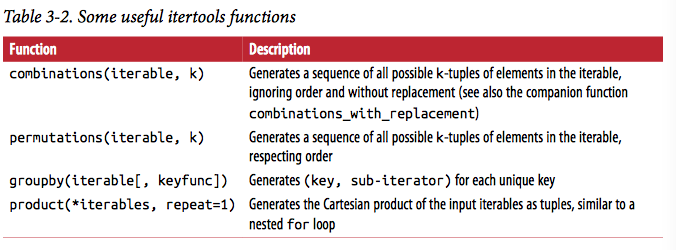

# 7 Errors and Exception Handling（错误和异常处理）

在数据分析应用中，许多函数只能用于特定的输入。比如float能把string变为浮点数，但如果有不正确的输入的话会报错：

In [48]:
float('1.2345')

1.2345

In [49]:
float('something')

ValueError: could not convert string to float: 'something'

假设我们想要这个float失败的优雅一些，返回输入的参数。我们可以用try/except：

In [50]:
def attempt_float(x):
    try:
        return float(x)
    except:
        return x

这个except的部分只有当float(x)引发异常的时候才会执行：

In [51]:
attempt_float('1.2345')

1.2345

In [52]:
attempt_float('something')

'something'

当然，float也可能引发除了ValueError之外的异常：

In [53]:
float((1, 2))

TypeError: float() argument must be a string or a number, not 'tuple'

你可能只想控制ValueError，因为如果是TypeError的话，错误提示对你debug是有帮助的：

In [54]:
def attempt_float(x):
    try:
        return float(x)
    except ValueError:
        return x

In [55]:
attempt_float((1, 2))

TypeError: float() argument must be a string or a number, not 'tuple'

当然，你也可以捕捉多个不同的异常：

In [56]:
def attempt_float(x):
    try:
        return float(x)
    except (TypeError, ValueError):
        return x

在某些情况下，你不想抑制任何异常，但你想希望执行某些代码，不论try里的代码成功执行与否。这样的话，需要用的finally:

In [57]:
f = open(path, 'w')

try:
    write_to_file(y)
finally:
    f.close()

NameError: name 'path' is not defined

这样的处理会始终会让f关闭。同样的，你可以在try里的代码成功执行后，让某些代码执行：

In [58]:
f = open(path, 'w')

try:
    write_to_file(f)
except:
    print('Failed')
else:
    print('Succeeded')
finally:
    f.close()

NameError: name 'path' is not defined

## Exceptions in IPython (IPython中的异常)

当使用%run执行代码片段，引发异常后，IPython中默认打印出所有的调用信息（traceback）

In [59]:
%run example/ipython_bug.py

ERROR:root:File `'example/ipython_bug.py'` not found.
